# Exploratory Data Analysis (EDA) of the Titanic dataset

Data source: https://www.kaggle.com/c/titanic

Goal of this excercise is to try to solve series of tasks which are very similar to the tasks you will face during working on the first (EDA) project in SU.

The idea is that you will take a look at the dataset which you have, probably, no prior knowledge and try to form a few hypotheses (de facto circa 5 questions) about the data and you will try to find an answers to them. 

**It is mandatory to write down your gained insight about each of the hypotheses in your notebook!**

#### Data Dictionary

|Variable|Definition|Key|
|:-------|:-------|:--------|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex||
|Age|Age in years||
|sibsp|# of siblings / spouses aboard the Titanic||
|parch|# of parents / children aboard the Titanic||
|ticket|Ticket number||
|fare|Passenger fare||
|cabin|Cabin number||
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancĂ©s were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Import used packages

In [1]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use

## Load the data into the Pandas DataFrame - in our case it is a csv file

In [2]:
df = pd.read_csv('titanic.csv', sep=',')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Task 1
**Description:** What percentage of passangers survived in different pclass?

First we need to calculate number of passengers for pclass and survived category.

In [6]:
agg_pclass_survived = df.groupby(['Pclass', 'Survived']).PassengerId.count()
agg_pclass_survived

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64

To calculate percentage ration of survivors in different class we need to calculate total for each class before calculation.

For example for first row we would calculate percentage on paper by calculcation $\frac{80}{80+136} = \frac{80}{216} = 0.370$

In [7]:
agg_pclass = df.groupby('Pclass').PassengerId.count()
agg_pclass

Pclass
1    216
2    184
3    491
Name: PassengerId, dtype: int64

We let previous variables as type pandas.Series, which include index (first row, indetifier). We can use this index for mathematical calculations :-). Position with matching index will be used for calculation.

In [8]:
agg_pclass_survived / agg_pclass

Pclass  Survived
1       0           0.370370
        1           0.629630
2       0           0.527174
        1           0.472826
3       0           0.757637
        1           0.242363
Name: PassengerId, dtype: float64

In [9]:
df_agg = (agg_pclass_survived / agg_pclass).reset_index(name='Ratio')
df_agg

,Pclass,Survived,Ratio
0,1,0,0.370370
1,1,1,0.629630
2,2,0,0.527174
3,2,1,0.472826
4,3,0,0.757637
5,3,1,0.242363


Lets visualize our result using seaborn.barplot

<AxesSubplot: xlabel='Pclass', ylabel='Ratio'>

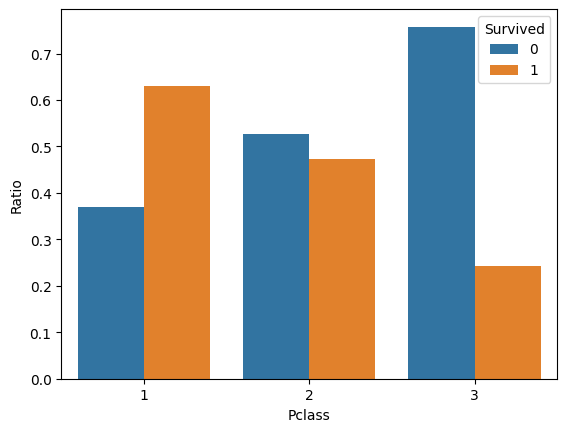

In [10]:
sns.barplot(data=df_agg, x='Pclass', y='Ratio', hue='Survived')

We can notice that higher percentage of survived is in 1st class - over 60%.

**Better visualization can be done in form of stacked bar plot. However, there is no easy way to do this in seaborn. Following is small example from internet for stacked bar plot using Matplotlib.**

<BarContainer object of 3 artists>

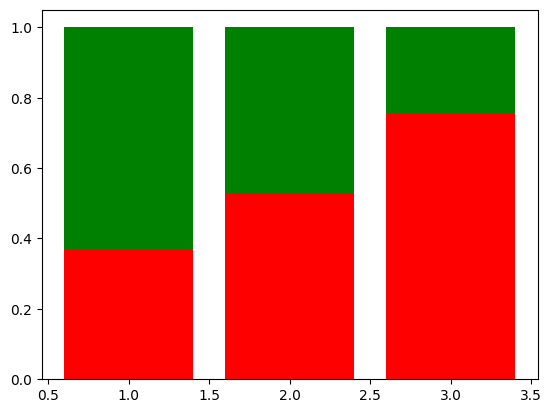

In [11]:
df_sur0 = df_agg[df_agg.Survived==0]
df_sur1 = df_agg[df_agg.Survived==1]
plt.bar(df_sur0.Pclass, df_sur0.Ratio, color='red')
plt.bar(df_sur1.Pclass, df_sur1.Ratio, color='green', bottom=df_sur0.Ratio)

Higher chance for survival had passangers from 1st class.

----------------------------------------------------------------------------------------------------------------
## Task 2
### Write down a few questions (5) and visualize solution with problem description and result description.
----------------------------------------------------------------------------------------------------------------

### 1. Number of men/women without accompaniment?
#### We can see that fewer women travelled alone than men. 

In [12]:
total_females = df.loc[df.Sex == 'female'].count().max()
total_males = df.loc[df.Sex == 'male'].count().max()
unaccompanied_females = df.loc[(df.SibSp == 0) & (df.Parch == 0) & (df.Sex == 'female'), :].count().max()
unaccompanied_males = df.loc[(df.SibSp == 0) & (df.Parch == 0) & (df.Sex == 'male'), :].count().max()

print(f'The number of womans without accompaniment: {unaccompanied_females}. Ratio: {(unaccompanied_females / total_females).round(1) * 100}%')
print(f'The number of mans without accompaniment: {unaccompanied_males}. Ratio: {(unaccompanied_males / total_males).round(1) * 100}%')

The number of womans without accompaniment: 126. Ratio: 40.0%
The number of mans without accompaniment: 411. Ratio: 70.0%


----------------------------------------------------------------------------------------------------------------
### 2. Did the place of embarkation affect survival?
#### According to the visualization, it looks like the later the passenger embarked, the more likely he didn't survive

<AxesSubplot: xlabel='Embarked', ylabel='Ratio'>

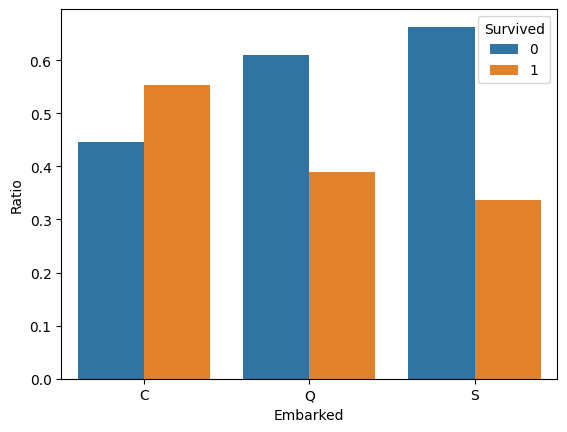

In [13]:
agg_pclass_survived = df.groupby(['Embarked', 'Survived']).PassengerId.count()
agg_embarked = df.groupby('Embarked').PassengerId.count()
df_agg_two = (agg_pclass_survived / agg_embarked).reset_index(name='Ratio')

sns.barplot(data=df_agg_two, x='Embarked', y='Ratio', hue='Survived')


----------------------------------------------------------------------------------------------------------------
### 3. Did age have an effect on survival?
#### It seems that age has effect on survival, most survivors were middle-aged people, i.e. from 15 to 40.
#### Most of the survivors were in their 20s.


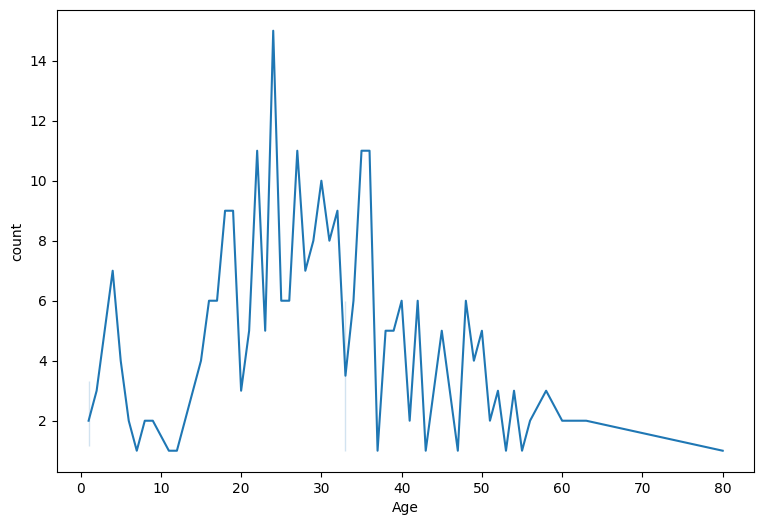

In [14]:
survived_age = df.loc[df.Survived == 1].groupby('Age')['Survived'].count().reset_index(name='count')
survived_age

survived_age['Age'] = survived_age['Age'].apply(np.ceil)
survived_age

fix = plt.figure(figsize=(9,6))
sns.lineplot(data=survived_age, x='Age', y='count')
plt.show()

----------------------------------------------------------------------------------------------------------------
### 4. Did place of embarked have an effect on Fare (price)?
#### It seems that the most expensive Fare was from the Cherbourg and cost of Tickets is highest from the Cherbourg in general



<AxesSubplot: xlabel='Embarked', ylabel='Fare'>

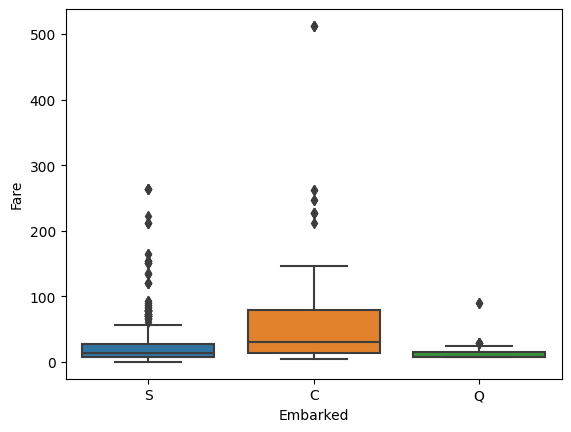

In [15]:

sns.boxplot(data=df, x='Embarked', y='Fare')

----------------------------------------------------------------------------------------------------------------
### 5. Did the fact that passenger had family have an effect on survival?
#### It seems that yes, number of people without family who did not survived is 2x times higher than with family. 



In [16]:
df['hasFamily'] = np.where((df['Parch'] > 0) | (df['SibSp'] > 0), True, False)

df_has_family = df.groupby(['Survived', 'hasFamily']).has_family.count().reset_index(name='Count')
sns.barplot(data=df_has_family, x='Survived', y='Count', hue='hasFamily')


AttributeError: 'DataFrameGroupBy' object has no attribute 'has_family'